In [1]:
import pickle

# Load your dataset
with open('/content/drive/MyDrive/MIT/full_shape_val_data.pkl', 'rb') as file:
    data = pickle.load(file)


In [2]:
# Generate a list of descriptions for each object-affordance pair
descriptions = []
for item in data:
    shape_id = item['shape_id']
    semantic_class = item['semantic class']
    for affordance in item['affordance']:
        description = f"{semantic_class} with {affordance} affordance"
        descriptions.append(description)


In [3]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-86if1ihp
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-86if1ihp
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.0 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=e2b0f930ae5023957ddfa86f207d3f99cdfdd6d896405165a21c59a0e468dd16
  Stored in directory: /tmp/pip-ephem-wheel-cache-bnjrshlf/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [5]:
import torch
import clip
from PIL import Image
import numpy as np

# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Preprocess and generate embeddings
embeddings = []
for description in descriptions:
    text_inputs = clip.tokenize([description]).to(device)
    with torch.no_grad():
        text_features = model.encode_text(text_inputs)
    embeddings.append(text_features.cpu().numpy())

# Convert list of numpy arrays into a single numpy array
embeddings = np.vstack(embeddings)


In [6]:
from sklearn.decomposition import PCA
import numpy as np

# Convert embeddings to a numpy array
X = np.array(embeddings)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


In [7]:
from sklearn.decomposition import PCA
import numpy as np

# Convert embeddings to a numpy array
X = np.array(embeddings)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


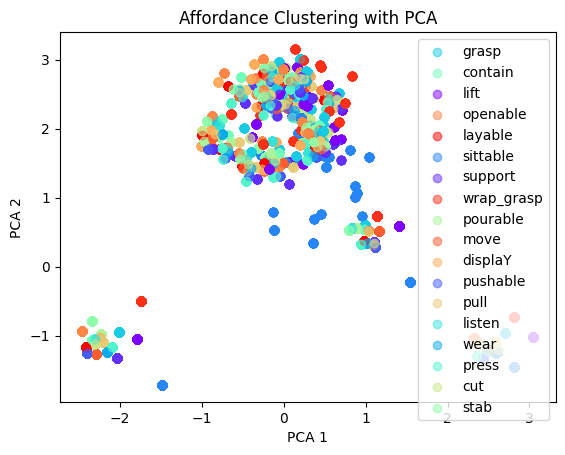

In [8]:
import matplotlib.pyplot as plt

# Assuming you have a list of affordances for coloring
affordances = [item for sublist in [item['affordance'] for item in data] for item in sublist]
# Map each unique affordance to a color
unique_affordances = list(set(affordances))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_affordances)))
affordance_to_color = dict(zip(unique_affordances, colors))

# Plot each point with its corresponding affordance color
for i, description in enumerate(descriptions):
    affordance = description.split(" with ")[1].split(" affordance")[0]
    plt.scatter(X_reduced[i, 0], X_reduced[i, 1], color=affordance_to_color[affordance], label=affordance, alpha=0.5)

# Create a legend for the first of each affordance type
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Affordance Clustering with PCA')
plt.show()


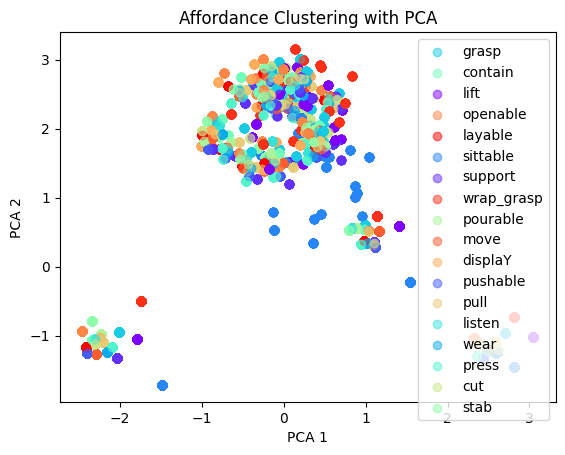

In [9]:
import matplotlib.pyplot as plt

# Assuming you have a list of affordances for coloring
affordances = [item for sublist in [item['affordance'] for item in data] for item in sublist]
# Map each unique affordance to a color
unique_affordances = list(set(affordances))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_affordances)))
affordance_to_color = dict(zip(unique_affordances, colors))

# Plot each point with its corresponding affordance color
for i, description in enumerate(descriptions):
    affordance = description.split(" with ")[1].split(" affordance")[0]
    plt.scatter(X_reduced[i, 0], X_reduced[i, 1], color=affordance_to_color[affordance], label=affordance, alpha=0.5)

# Create a legend for the first of each affordance type
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Affordance Clustering with PCA')
plt.show()
